<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/08_simple_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# simple clustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 1: Generate synthetic data
def generate_data():
    """
    Generate synthetic 2D data points for clustering.
    """
    np.random.seed(42)
    X = np.random.rand(100, 2) * 10  # 100 points in a 2D space (0-10)
    return X

# Step 2: Simple clustering algorithm
def simple_clustering(X, threshold=2.0):
    """
    Perform simple clustering with a fixed threshold distance.
    - X: Input data (numpy array of shape [n_samples, 2])
    - threshold: Distance threshold for clustering
    Returns:
        clusters: List of clusters, each cluster contains a list of data point indices.
    """
    centroids = []  # List of cluster centroids
    clusters = []   # List of clusters (indices of data points)

    for idx, point in enumerate(X):
        added_to_cluster = False

        # Check distance to existing centroids
        for i, centroid in enumerate(centroids):
            distance = np.linalg.norm(point - centroid)
            if distance <= threshold:
                clusters[i].append(idx)
                # Update the centroid of the cluster
                centroids[i] = np.mean(X[clusters[i]], axis=0)
                added_to_cluster = True
                break

        # If not added to any existing cluster, create a new cluster
        if not added_to_cluster:
            centroids.append(point)
            clusters.append([idx])

    return clusters, centroids

# Step 3: Visualize clustering results
def plot_clusters(X, clusters, centroids):
    """
    Visualize the results of simple clustering.
    - X: Input data
    - clusters: List of clusters (indices of points)
    - centroids: List of cluster centroids
    """
    plt.figure(figsize=(8, 6))
    colors = plt.cm.get_cmap('tab10', len(clusters))

    for i, cluster in enumerate(clusters):
        cluster_points = X[cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    label=f'Cluster {i+1}', color=colors(i), s=50)

        # Plot centroids
        plt.scatter(centroids[i][0], centroids[i][1], c='red', marker='x', s=200)

    plt.title("Simple Clustering Results")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()




Number of clusters formed: 15


<ipython-input-3-fbe81d527252>:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(clusters))


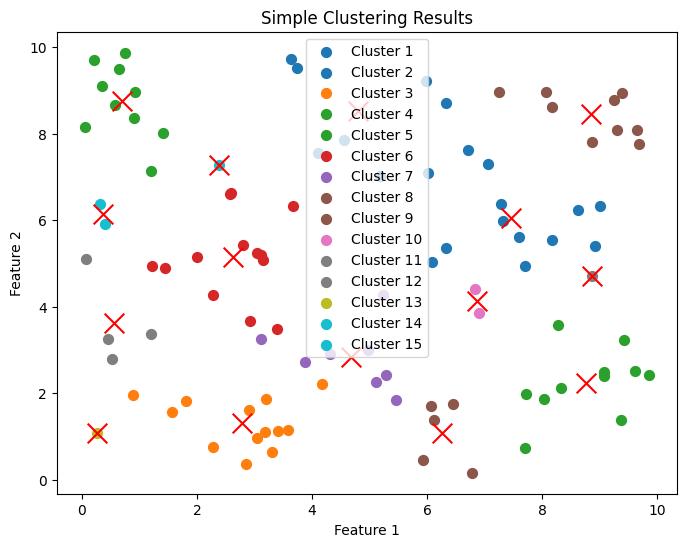

In [4]:
# Main execution
if __name__ == "__main__":
    # Step 1: Generate synthetic data
    data = generate_data()

    # Step 2: Perform simple clustering
    threshold_distance = 2.0  # Adjust the threshold value as needed
    clusters, centroids = simple_clustering(data, threshold=threshold_distance)

    # Print the number of clusters
    print(f"Number of clusters formed: {len(clusters)}")

    # Step 3: Visualize clustering results
    plot_clusters(data, clusters, centroids)